<a href="https://colab.research.google.com/github/HoangQuanHCMUTEK19/CNN/blob/main/Nhandientienviet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Flatten,Conv2D,MaxPooling2D
from keras.datasets import mnist, fashion_mnist, cifar10, cifar100
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
from keras.utils import np_utils
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v2 as tf
from tensorflow import keras
import os
import pickle
import pandas as pd
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.preprocessing import  image

In [7]:
#Link Train va test
train_path = '/content/drive/MyDrive/TienViet/'

In [8]:
#Ket noi voi google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
path_img = []
labels = ['200','500','1000','2000','5000','10000','20000','50000','100000','200000','500000']
x_train = []
y_train = []
# Tao dataset
for i in labels:
  path = os.path.join(train_path,i)
  index_label = labels.index(i)
  for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(200,300)) 
      img = img_to_array(img)
      img = img.reshape(200,300,3) 
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)

# xử lí dữ liệu
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train)

In [10]:
#Thiết lập model 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 300, 3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 150, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 480000)            0         
                                                                 
 dense (Dense)               (None, 256)               122880256 
                                                                 
 dense_1 (Dense)             (None, 11)                2827      
                                                                 
Total params: 122,883,979
Trainable params: 122,883,979
Non-trainable params: 0
__________________________________________

In [11]:
#Complie Model 
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])

In [12]:
#Training Model 
history = model.fit(x_train,y_train,epochs = 20)

Epoch 1/20
3/3 [==============================] - 7s 2s/step - loss: 2.1525 - accuracy: 0.0761
Epoch 2/20
3/3 [==============================] - 6s 2s/step - loss: 3.4860 - accuracy: 0.0652
Epoch 3/20
3/3 [==============================] - 6s 2s/step - loss: 1.3392 - accuracy: 0.1304
Epoch 4/20
3/3 [==============================] - 6s 2s/step - loss: 0.5082 - accuracy: 0.1739
Epoch 5/20
3/3 [==============================] - 6s 2s/step - loss: 0.3892 - accuracy: 0.3261
Epoch 6/20
3/3 [==============================] - 6s 2s/step - loss: 0.3066 - accuracy: 0.2500
Epoch 7/20
3/3 [==============================] - 6s 2s/step - loss: 0.3150 - accuracy: 0.3804
Epoch 8/20
3/3 [==============================] - 6s 2s/step - loss: 0.2657 - accuracy: 0.7174
Epoch 9/20
3/3 [==============================] - 6s 2s/step - loss: 0.2523 - accuracy: 0.7826
Epoch 10/20
3/3 [==============================] - 6s 2s/step - loss: 0.2326 - accuracy: 0.8043
Epoch 11/20
3/3 [==============================] 

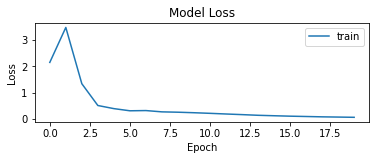

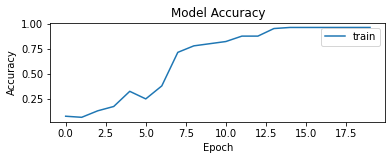

In [13]:
#Vẽ đồ thị loss 
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()
#Vẽ đồ thị Accuracy
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()

Đây là tờ 500000


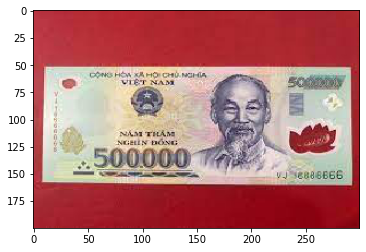

In [14]:
#Load ảnh 
img = image.load_img('500k1.jpg',target_size=(200,300))
plt.imshow(img)
#Chuyển ảnh về mảng 
img = img_to_array(img)
img = img.reshape(1,200,300,3) #thay đổi hình dạng mảng 
img = img.astype('float32') #thay đổi kiểu dữ liệuliệu
img = img/255 #chuẩn hóa dữ liệu thành 0 và  1 
print('Đây là tờ '+ labels[np.argmax(model.predict(img))]) #dự đoán 



Đây là tờ 200000


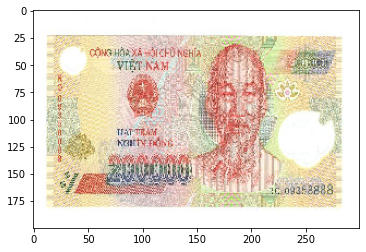

In [15]:
#Load ảnh 
img1 = image.load_img('8888-200K.jpg',target_size=(200,300))
plt.imshow(img1)
#Chuyển ảnh về mảng 
img1 = img_to_array(img1)
img1 = img1.reshape(1,200,300,3) #thay đổi hình dạng mảng 
img1 = img1.astype('float32') #thay đổi kiểu dữ liệuliệu
img1 = img1/255 #chuẩn hóa dữ liệu thành 0 và  1 
print('Đây là tờ '+ labels[np.argmax(model.predict(img1))]) #dự đoán 


Đây là tờ 5000


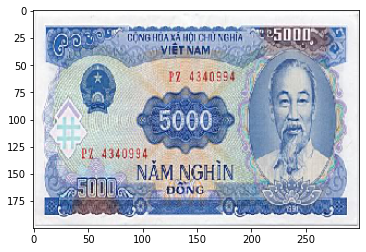

In [16]:
#Load ảnh 
img2 = image.load_img('Đồng_bạc_5000_đồng.jpg',target_size=(200,300))
plt.imshow(img2)
#Chuyển ảnh về mảng 
img2 = img_to_array(img2)
img2 = img2.reshape(1,200,300,3) #thay đổi hình dạng mảng 
img2 = img2.astype('float32') #thay đổi kiểu dữ liệuliệu
img2 = img2/255 #chuẩn hóa dữ liệu thành 0 và  1 
print('Đây là tờ '+ labels[np.argmax(model.predict(img2))]) #dự đoán 